<a href="https://colab.research.google.com/github/hideaki-kyutech/test/blob/master/02_softcomputing_moore's_law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mooreの法則
トランジスタ数は2年で約２倍

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2022/softcomputing/02/moore.csv', header=None).values

In [ ]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [ ]:
X = data[:, 0].reshape(-1,1)
Y = data[:, 1].reshape(-1,1)

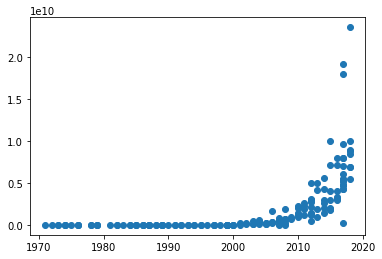

In [ ]:
plt.scatter(X,Y);

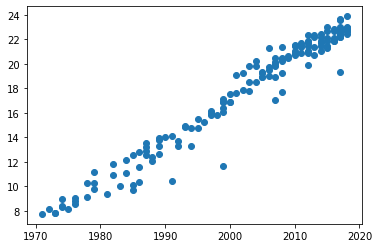

In [ ]:
Y = np.log(Y)
plt.scatter(X,Y);

In [ ]:
# standardization
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X-mx)/sx
Y = (Y-my)/sy

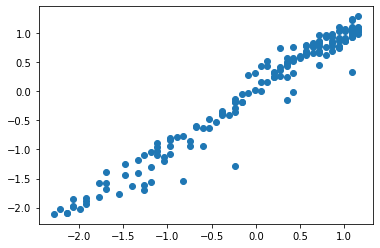

In [ ]:
plt.scatter(X,Y);

In [ ]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [ ]:
model = nn.Linear(1,1)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [ ]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [ ]:
# train
n_epochs = 100
losses = []
for it in range(n_epochs):
  optimizer.zero_grad()

  outputs = model(inputs)
  loss = criterion(outputs, targets)

  losses.append(loss.item())

  loss.backward()
  optimizer.step()

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():4f}')

Epoch 1/100, Loss: 0.544478
Epoch 2/100, Loss: 0.524440
Epoch 3/100, Loss: 0.491688
Epoch 4/100, Loss: 0.451945
Epoch 5/100, Loss: 0.409381
Epoch 6/100, Loss: 0.366853
Epoch 7/100, Loss: 0.326198
Epoch 8/100, Loss: 0.288493
Epoch 9/100, Loss: 0.254284
Epoch 10/100, Loss: 0.223750
Epoch 11/100, Loss: 0.196836
Epoch 12/100, Loss: 0.173344
Epoch 13/100, Loss: 0.152996
Epoch 14/100, Loss: 0.135480
Epoch 15/100, Loss: 0.120477
Epoch 16/100, Loss: 0.107679
Epoch 17/100, Loss: 0.096797
Epoch 18/100, Loss: 0.087570
Epoch 19/100, Loss: 0.079763
Epoch 20/100, Loss: 0.073170
Epoch 21/100, Loss: 0.067611
Epoch 22/100, Loss: 0.062929
Epoch 23/100, Loss: 0.058990
Epoch 24/100, Loss: 0.055679
Epoch 25/100, Loss: 0.052898
Epoch 26/100, Loss: 0.050563
Epoch 27/100, Loss: 0.048604
Epoch 28/100, Loss: 0.046961
Epoch 29/100, Loss: 0.045584
Epoch 30/100, Loss: 0.044429
Epoch 31/100, Loss: 0.043462
Epoch 32/100, Loss: 0.042652
Epoch 33/100, Loss: 0.041973
Epoch 34/100, Loss: 0.041404
Epoch 35/100, Loss: 0.0

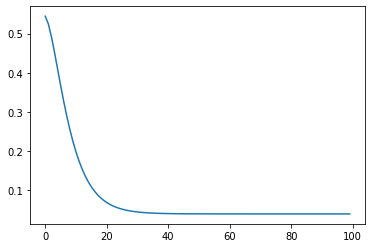

In [ ]:
plt.plot(losses);

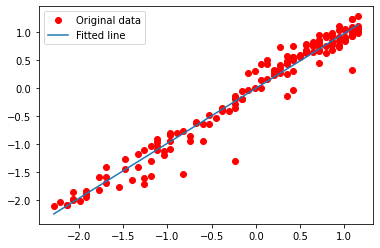

In [ ]:
predicted = model(inputs).detach().numpy()
plt.plot(X,Y,'ro', label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w,b)

[[0.9804337]] [2.1472513e-05]


$C = C_0 r^t$

$\log C = \log C_0 + \log r \times t$

$y = mx + b$

where $x=t$, $m=\log r$, $b=\log C_0$  

$y' = \frac{y-m_y}{s_y}$

$x' = \frac{x-m_x}{s_x}$

$y' = wx'+b$

$m=w \frac{s_y}{s_x}$

In [ ]:
m = w[0,0] * sy / sx
print(m)

0.34163460282735114


$ t'-t= \frac{\log 2}{m}$

In [ ]:
print('Time to double:', np.log(2)/m)

Time to double: 2.0289138594963547


##レポート

1.   ムーアの法則のデータ解析プロセスから、2年で２倍になるという結論がなぜ導けるのかについて説明しなさい。

2.   標準化しなかった場合、その後のプログラムの結果はどうなっていくのかについて観察して、考察せよ。

